In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats
import numpy as np
sns.set(style="whitegrid")

### Comparison of word choice metrics

In [2]:
root = '/data0/lucy/ingroup_lang/'

In [3]:
count_cut_off = 30
pmi_cut_off = 0.8
tfidf_cut_off = 5

In [53]:
def metric_correlation(metric1, metric2, sr_f, path1, path2): 
    df1 = pd.read_csv(path1 + sr_f, engine='python')
    df2 = pd.read_csv(path2 + sr_f, engine='python')
    df = pd.merge(df1, df2, on='word', how='outer')
    p = sns.scatterplot(x=metric1, y=metric2, data=df)
    print(stats.pearsonr(df[metric1], df[metric2]))
    plt.title(sr_f)
    plt.show()
def metric_correlation_generic(metric1, metric2, path1, path2, join_on, title, ylog=False, ylim=None): 
    df1 = pd.read_csv(path1, engine='python')
    df2 = pd.read_csv(path2, engine='python')
    df = pd.merge(df1, df2, on=join_on, how='outer')
    p = sns.scatterplot(x=metric1, y=metric2, data=df)
    print(stats.pearsonr(df[metric1], df[metric2]))
    if ylog: 
        plt.yscale('log')
    if ylim: 
        plt.ylim(ylim)
    plt.title(title)
    plt.show()

(0.8860148331453418, 0.0)


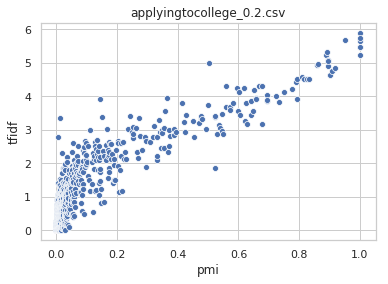

In [5]:
metric_correlation('pmi', 'tfidf', 'applyingtocollege_0.2.csv', root + 'logs/pmi/', root + 'logs/tfidf/')

(0.675550357533754, 0.0)


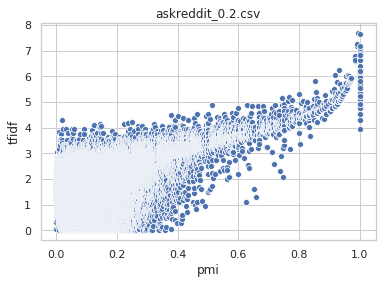

In [6]:
metric_correlation('pmi', 'tfidf', 'askreddit_0.2.csv', root + 'logs/pmi/', root + 'logs/tfidf/')

### Comparison of user metrics

(0.22727442764357972, 5.71410715088342e-07)


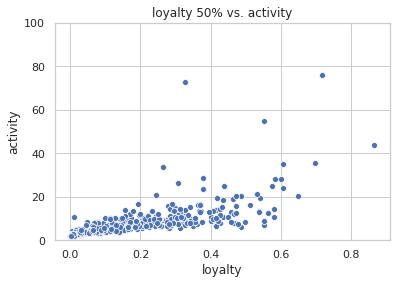

In [54]:
# for different thresholds, the pearson corr is still around 0.22
# however there are subreddits with similar levels of activity but different loyalty
threshold = 50
commentor_path1 = root + 'logs/commentor_loyalty_'+str(threshold)
commentor_path2 = root + 'logs/commentor_activity'
metric_correlation_generic('loyalty', 'activity', commentor_path1, commentor_path2, 
                           'subreddit', 'loyalty ' + str(threshold) + '% vs. activity', ylim=(0,100))

### Word choice vs. word frequency

In [15]:
def metric_vs_frequency(metric_name, path, n): 
    # generate plot for 10 subreddits
    i = 0
    for f in os.listdir(path): 
        if not f.endswith('.csv'): continue
        df = pd.read_csv(path + f, engine='python')
        df = df[df['count'] > count_cut_off]
        p = sns.scatterplot(x='count', y=metric_name, data=df)
        p.figure.get_axes()[0].set_xscale('log')
        plt.title(f)
        plt.show()
        i += 1
        if i > n: break

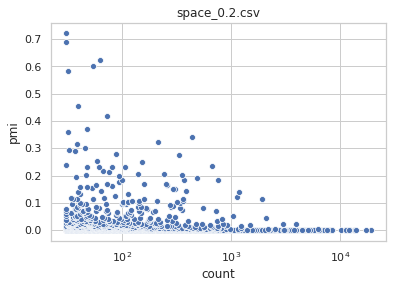

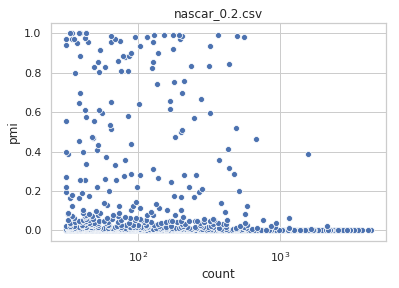

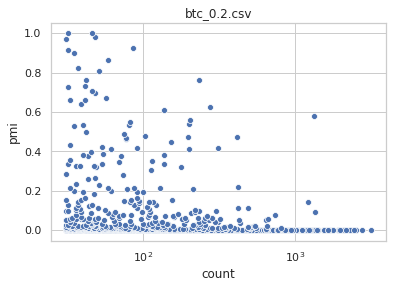

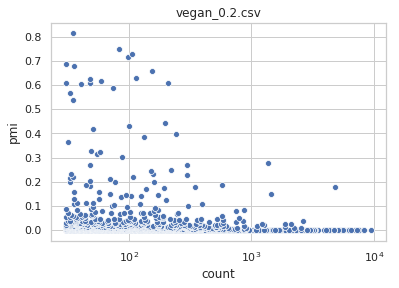

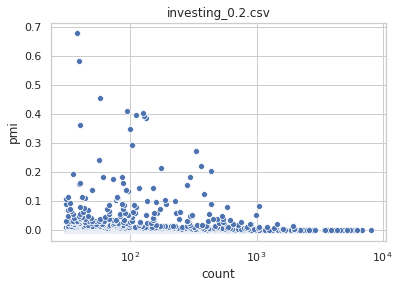

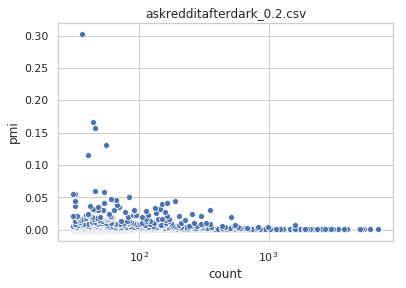

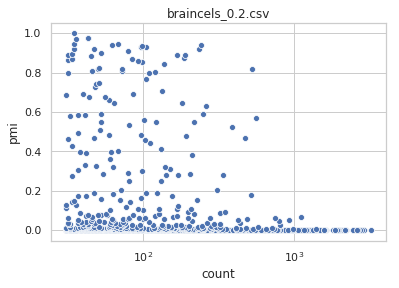

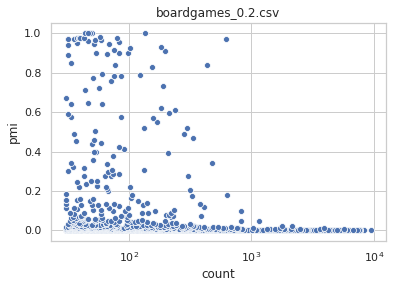

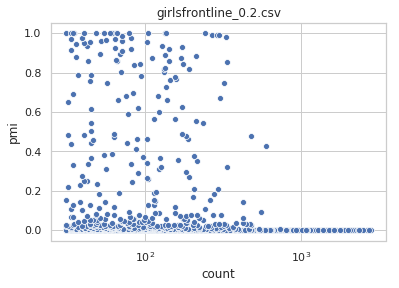

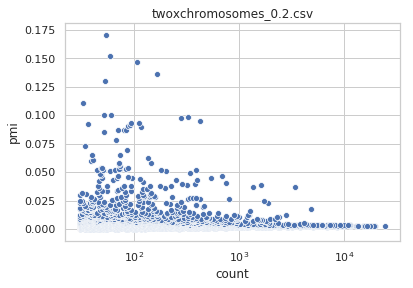

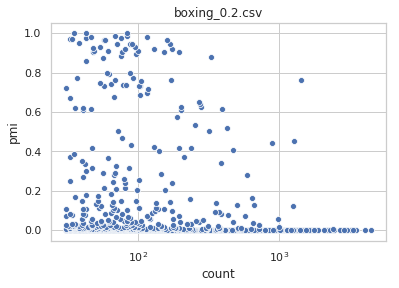

In [16]:
metric_vs_frequency('pmi', root + 'logs/pmi/', 10)

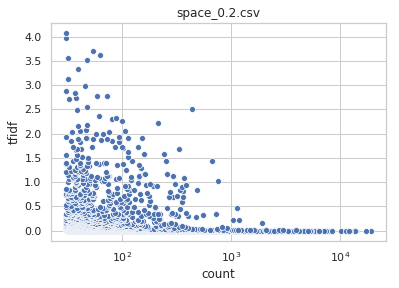

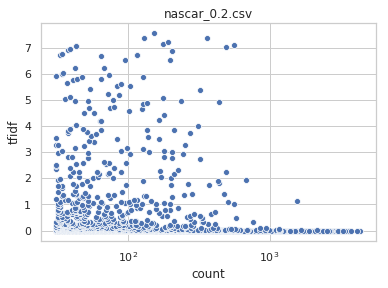

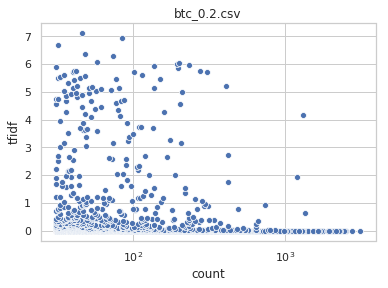

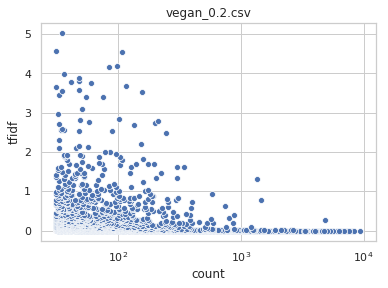

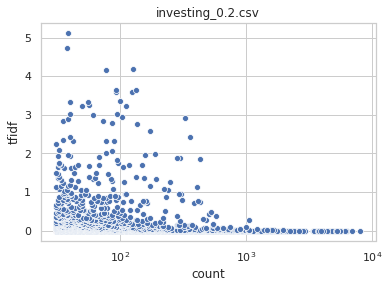

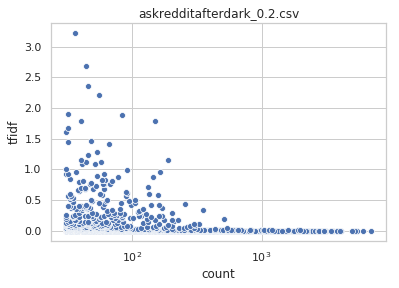

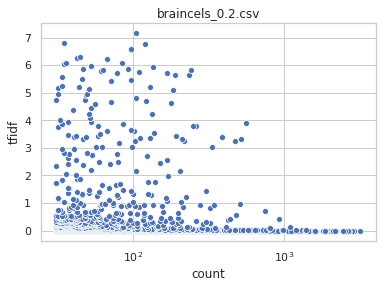

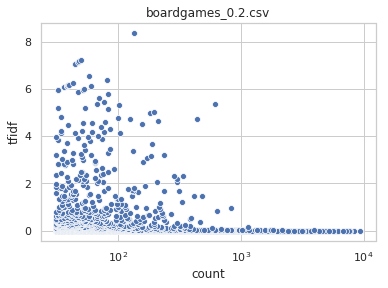

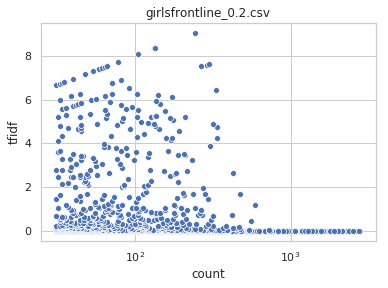

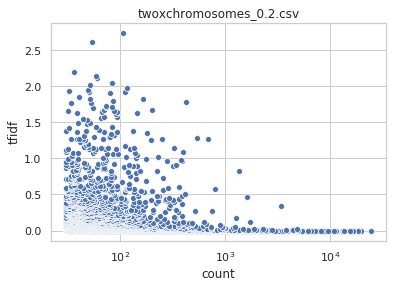

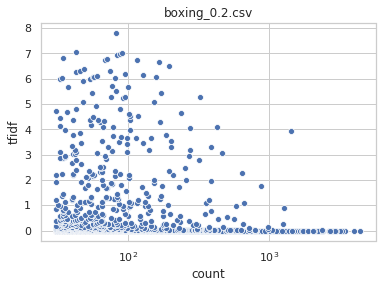

In [17]:
metric_vs_frequency('tfidf', root + 'logs/tfidf/', 10)

In [21]:
def single_metric_vs_frequency(sr_f, metric_name, path): 
    df = pd.read_csv(path + sr_f, engine='python')
    df = df[df['count'] > count_cut_off]
    p = sns.scatterplot(x='count', y=metric_name, data=df)
    p.figure.get_axes()[0].set_xscale('log')
    plt.title(sr_f)
    plt.show()

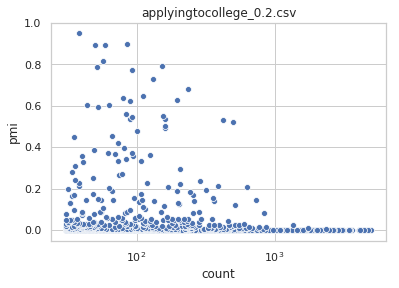

In [22]:
# Look at a single subreddit
single_metric_vs_frequency('applyingtocollege_0.2.csv', 'pmi', root + 'logs/pmi/')

### Histogram of word choice values

In [39]:
def word_choice_hist(metric_name, path, n): 
    i = 0
    for f in os.listdir(path): 
        if not f.endswith('.csv'): continue
        df = pd.read_csv(path + f, engine='python')
        df = df[df['count'] > count_cut_off]
        p = sns.distplot(a=df[metric_name], kde=False)
        plt.yscale('log')
        plt.ylabel('# of words')
        plt.title(f)
        plt.show()
        i += 1
        if i > n: break

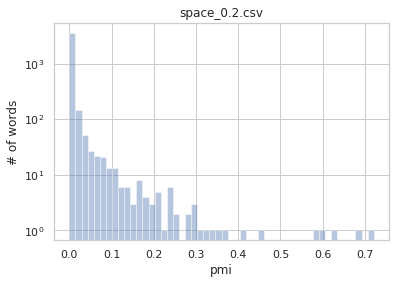

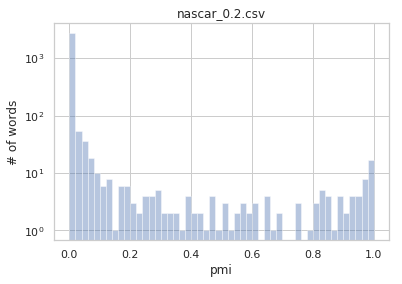

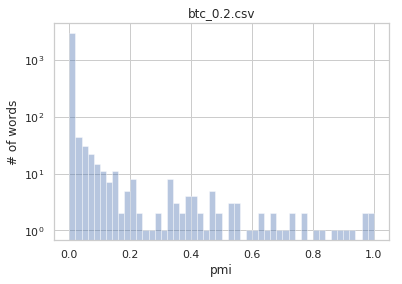

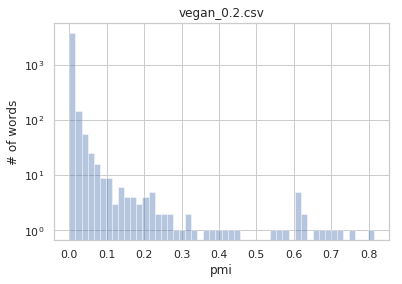

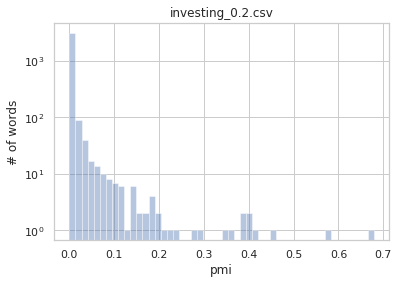

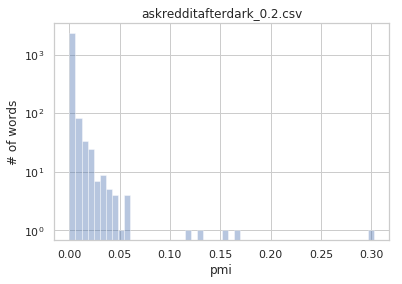

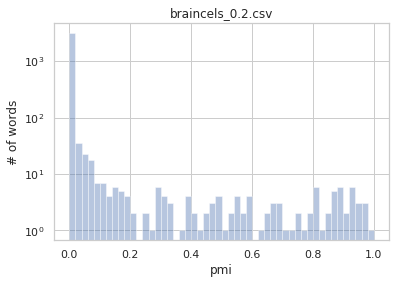

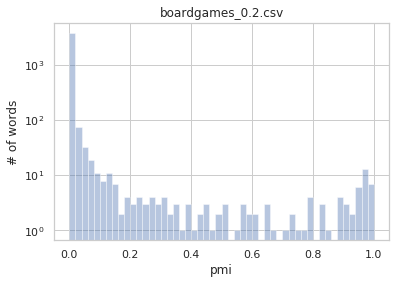

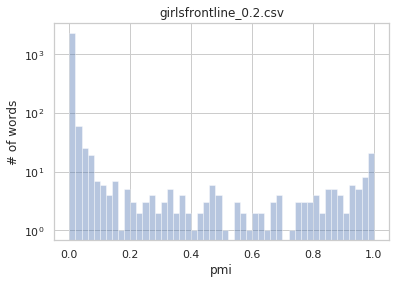

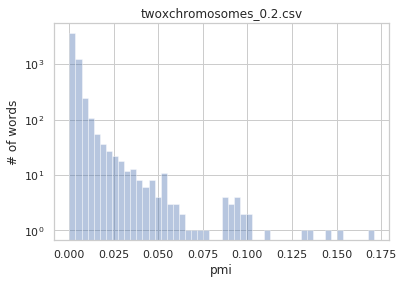

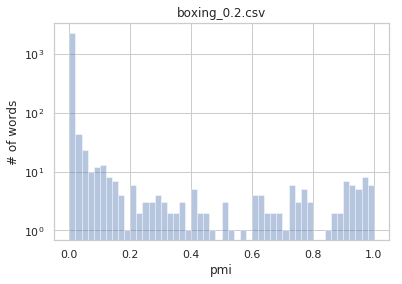

In [40]:
word_choice_hist('pmi', root+'/logs/pmi/', 10)

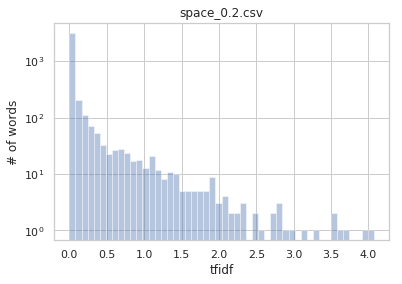

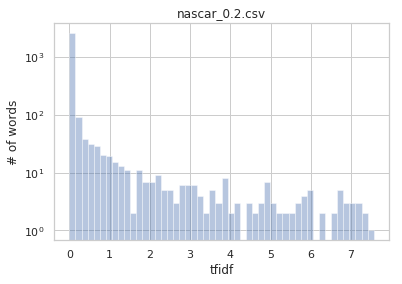

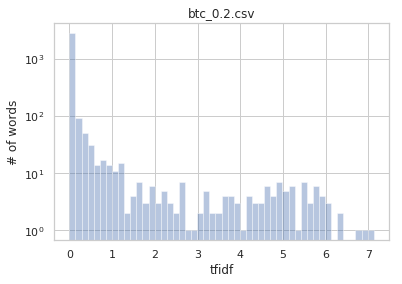

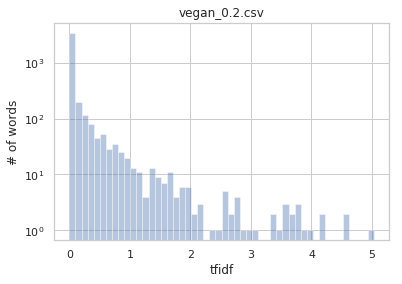

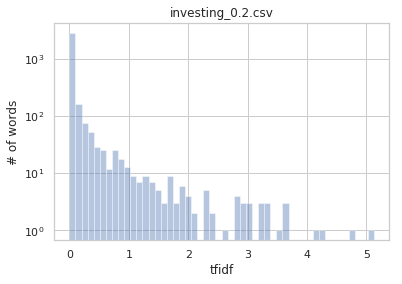

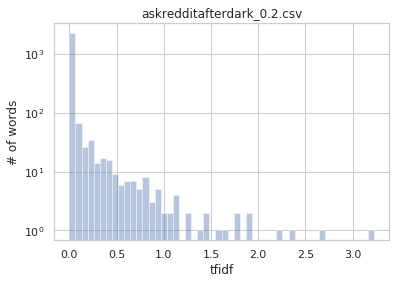

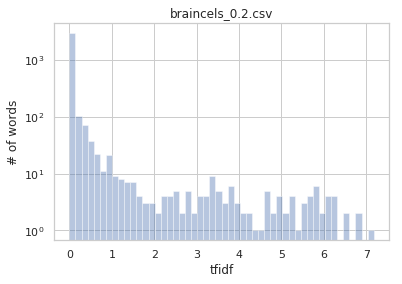

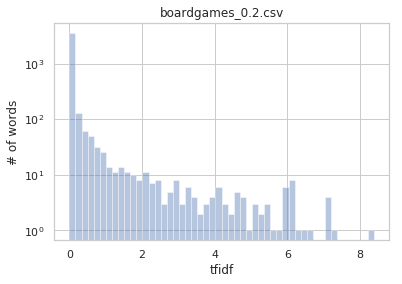

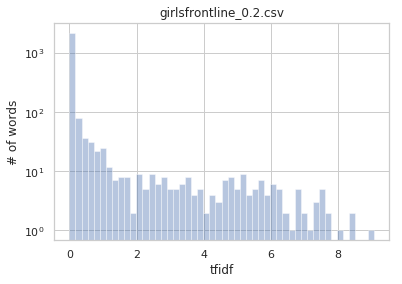

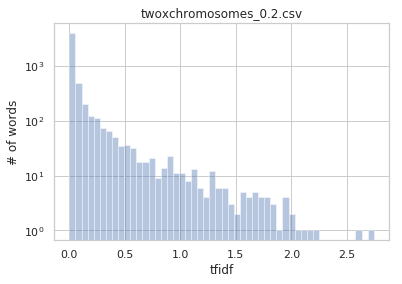

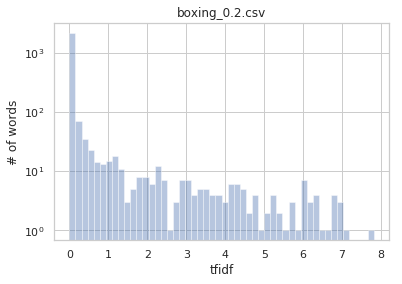

In [41]:
word_choice_hist('tfidf', root+'/logs/tfidf/', 10)

### Size of community vs word choice

In [17]:
def community_size_word_choice(commentor_path, metric_name, path, cut_off, xlabel, scatter=False, xlog=True): 
    sr_ncoms = pd.read_csv(commentor_path, engine='python').set_index('subreddit').T.to_dict('list')
    suffix = '_0.2.csv'
    y = []
    x = []
    srs = []
    for f in os.listdir(path): 
        if not f.endswith('.csv'): continue
        subreddit = f.replace(suffix, '')
        df = pd.read_csv(path + f, engine='python')
        notable_words = df[df['count'] > count_cut_off]
        num_words = len(notable_words)
        high_val_df = notable_words[notable_words[metric_name] > cut_off]
        num_high_val = len(high_val_df)
        score = num_high_val / float(num_words)
        y.append(score)
        x.append(sr_ncoms[subreddit][0])
        srs.append(subreddit)
    if scatter == True: 
        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, alpha=0.5)
        if xlog: 
            plt.xscale('log')
    else: 
        if xlog: 
            x = np.log10(x)
        g = sns.jointplot(x, y, kind='hex')
    plt.ylabel(metric_name + ' > ' + str(cut_off) + ' / total words')
    plt.xlabel(xlabel)
    plt.show()

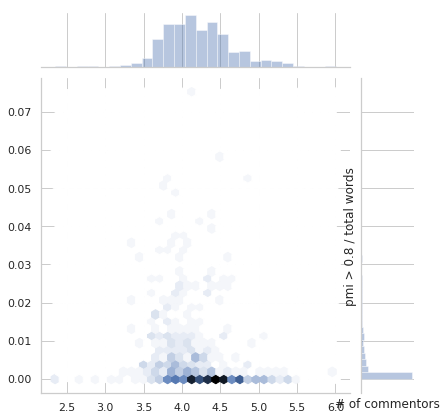

In [97]:
commentor_path = root + 'logs/commentor_counts/part-00000-f83d5d87-c50d-4d5a-a560-e978e85e0af8-c000.csv'
community_size_word_choice(commentor_path, 'pmi', root + '/logs/pmi/', pmi_cut_off, '# of commentors')

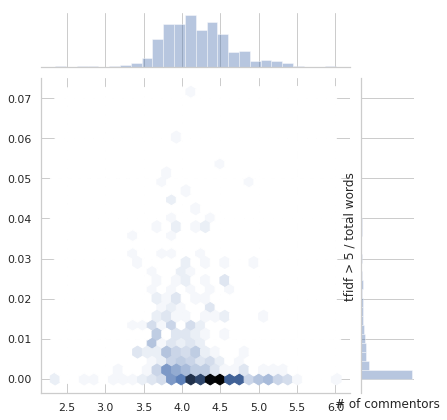

In [98]:
commentor_path = root + 'logs/commentor_counts/part-00000-f83d5d87-c50d-4d5a-a560-e978e85e0af8-c000.csv'
community_size_word_choice(commentor_path, 'tfidf', root + '/logs/tfidf/', tfidf_cut_off, '# of commentors')

### User activity vs word choice

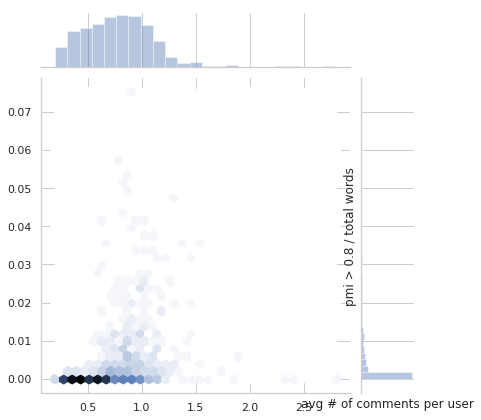

In [99]:
commentor_path = root + 'logs/commentor_activity'
community_size_word_choice(commentor_path, 'pmi', root + '/logs/pmi/', \
                           pmi_cut_off, 'avg # of comments per user')

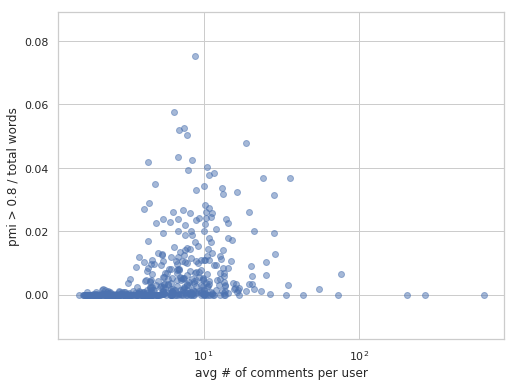

In [101]:
commentor_path = root + 'logs/commentor_activity'
community_size_word_choice(commentor_path, 'pmi', root + '/logs/pmi/', \
                           pmi_cut_off, 'avg # of comments per user', scatter=True)

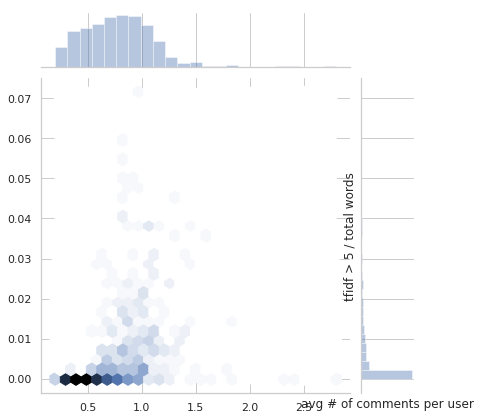

In [100]:
commentor_path = root + 'logs/commentor_activity'
community_size_word_choice(commentor_path, 'tfidf', root + '/logs/tfidf/', \
                           tfidf_cut_off,  'avg # of comments per user')

### User loyalty vs word choice

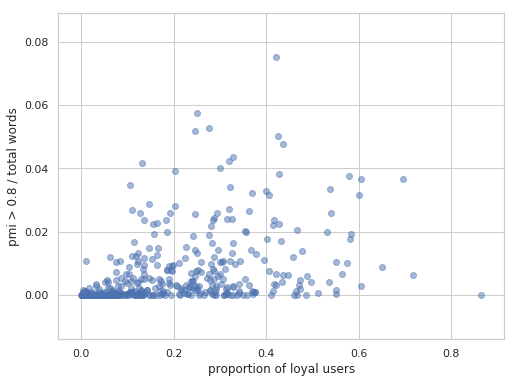

In [55]:
threshold = 50
commentor_path = root + 'logs/commentor_loyalty_'+str(threshold)
community_size_word_choice(commentor_path, 'pmi', root + '/logs/pmi/', \
                           pmi_cut_off, 'proportion of loyal users', scatter=True, xlog=False)

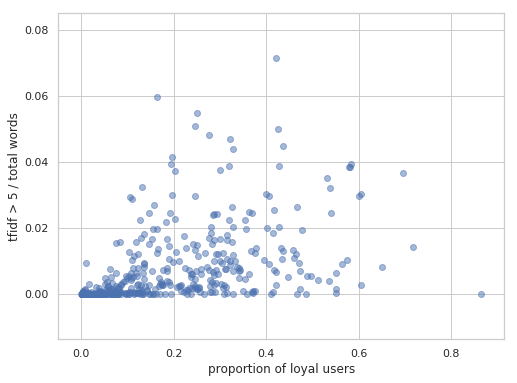

In [56]:
commentor_path = root + 'logs/commentor_loyalty_'+str(threshold)
community_size_word_choice(commentor_path, 'tfidf', root + '/logs/tfidf/', \
                           tfidf_cut_off,  'proportion of loyal users', scatter=True, xlog=False)

### What are the outliers? (deprecated)

In [8]:
'''
meme economy is entirely numbers
market76 is full of user names
hardwareswap is full of timestamps
jobuds (which is a nsfw subreddit) I think has usernames without u/
market76 has a bunch of uesrnames that aren't reddit but instead [PS4] IGN: Mastabata69
'''
for i, val in enumerate(y): 
    if val > 0.1: 
        print(srs[i], x[i], y[i])

In [9]:
"""
transcribersofreddit might be bots
fakecollegefootball is just weird, has stuff like bji09c from datatags generated by bots
counting has things like a5 with high counts due to counting chess matches 
"""
for i, val in enumerate(x): 
    if val < 1000: 
        print(srs[i], x[i], y[i])

('centerleftpolitics', 794, 0.0)
('fakecollegefootball', 239, 0.0)
('counting', 471, 0.0)
('transcribersofreddit', 222, 0.0)
